# Problem Set 2 - Deadline 02/02/2023

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

In [2]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)


IPython version:      7.31.1 (need at least 1.0)
Numpy version:        1.23.5 (need at least 1.7.1)
SciPy version:         1.9.3 (need at least 0.12.0)
Pandas version:        1.4.4 (need at least 0.11.0)
Maplotlib version:     3.6.2 (need at least 1.2.1)
Scikit-Learn version:  1.0.2 (need at least 0.13.1)


---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [3]:
# Read the data.
pdata = pd.read_csv("progresa_sample.csv")

# Find the columns that contain non-numeric data.
pdata.select_dtypes(include = 'object').columns

# Convert them into numeric format.
pdata["poor"] = pdata["poor"].replace(["pobre", "no pobre"], [1, 0])
pdata["progresa"] = pdata["progresa"].replace(["basal", "0"], [1, 0])

# Drop the columns which we won't use, 0 for row, 1 for column. 
data = pdata.drop(labels = ['year','folnum','village'], axis = 1)

# Sort the variable name alphabetizelly. 
data_summary = data.describe().loc[['mean', '50%', 'std']].T.sort_index()
data_summary.rename(columns = {'50%': 'median'})

,mean,median,std
age,11.366460,11.000000,3.167744
dist_cap,147.674452,132.001494,76.063134
dist_sec,2.418910,2.279000,2.234109
fam_n,7.215715,7.000000,2.352900
grc,3.963537,4.000000,2.499063
grc97,3.705372,4.000000,2.572387
hohage,44.436717,43.000000,11.620372
hohedu,2.768104,2.000000,2.656106
hohsex,0.925185,1.000000,0.263095
hohwag,586.985312,500.000000,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre'). 
 
For this question and subsequent questions, you can use either Welch's t-test or Student's t-test. Please specify in one sentence why you chose the particular t-test.


In [16]:
from scipy import stats

# Divide the data into treatment group and control group. 
treatement = pdata[(pdata['year'] == 97) & (pdata['poor'] == 1) & (pdata['progresa'] == 1)]
control = pdata[(pdata['year'] == 97) & (pdata['poor'] == 1) & (pdata['progresa'] == 0)]

# Drop the variables in 1997 which are not demographic.
treatment_data = treatement.drop(labels=['year', 'folnum','village', 'poor', 'progresa'], axis = 1)
control_data = control.drop(labels=['year', 'folnum','village', 'poor', 'progresa'], axis = 1)


# Calculate the average. 
mean_T = treatment_data.mean()
mean_C = control_data.mean()
var_T = treatment_data.var()
var_C = control_data.var()
print(var_T)
print(var_C)


# Calculate p-value.
# I use the Welch's t-test since I think for some variables such as the dist_sec and dist_cap, each group has quite different variance. 
pvalue = []
for col in treatment_data.columns:
    stat, pval = stats.ttest_ind(treatment_data[~treatment_data[col].isnull()][col],
                                 control_data[~control_data[col].isnull()][col],
                                 equal_var = False)
    pvalue.append(pval)

# Create the DataFrame.
data_T = pd.DataFrame({"Variables": treatment_data.columns,
                        "Average value (Treatment Villages)": mean_T,
                              "Average value (Control villages)": mean_C , 
                              "Difference (Treat - Control)": mean_T  - mean_C ,
                              "p-value": pvalue
})

# Sort the order. 
data_T.sort_values('Variables', inplace = True)
data_T.reset_index(drop = True, inplace = True)
data_T

       year  sex  indig  dist_sec   sc  grc  fam_n    min_dist    dist_cap  \
6        97  0.0    0.0     3.154  0.0  6.0      6  127.114780  154.196003   
8        97  1.0    0.0     3.373  1.0  2.0      5   85.300272  105.878669   
10       97  0.0    0.0     3.373  1.0  2.0      5   85.300272  105.878669   
12       97  0.0    0.0     3.373  NaN  0.0      5   85.300272  105.878669   
14       97  1.0    1.0     1.935  1.0  2.0      5  127.657608  333.048731   
...     ...  ...    ...       ...  ...  ...    ...         ...         ...   
77240    97  0.0    1.0     3.148  1.0  2.0      8  137.473203  172.770829   
77242    97  1.0    1.0     3.148  1.0  1.0      9  137.473203  172.770829   
77244    97  0.0    1.0     3.148  1.0  2.0      6  137.473203  172.770829   
77246    97  1.0    1.0     3.148  1.0  1.0      6  137.473203  172.770829   
77248    97  0.0    1.0     3.148  0.0  2.0      3  137.473203  172.770829   

       poor  ...  hohedu  hohwag  welfare_index  hohsex  hohage

,Variables,Average value (Treatment Villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.716991,10.742023,-0.025032,4.783633e-01
1,dist_cap,150.829074,153.769730,-2.940656,1.146482e-03
2,dist_sec,2.453122,2.507662,-0.054540,4.266282e-02
3,fam_n,7.281327,7.302469,-0.021142,4.289667e-01
4,grc,3.531599,3.543050,-0.011450,6.895228e-01
5,grc97,3.531599,3.543050,-0.011450,6.895228e-01
6,hohage,43.648828,44.276918,-0.628090,2.259461e-06
7,hohedu,2.663139,2.590348,0.072791,1.038219e-02
8,hohsex,0.924656,0.922947,0.001709,5.721253e-01
9,hohwag,544.339544,573.163558,-28.824015,3.287285e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

In [4]:
data_T[data_T['p-value'] < 0.05]

,Variables,Average value (Treatment Villages),Average value (Control villages),Difference (Treat - Control),p-value
1,dist_cap,150.829074,153.769730,-2.940656,1.146482e-03
2,dist_sec,2.453122,2.507662,-0.054540,4.266282e-02
5,hohage,43.648828,44.276918,-0.628090,2.259461e-06
6,hohedu,2.663139,2.590348,0.072791,1.038219e-02
8,hohwag,544.339544,573.163558,-28.824015,3.287285e-04
10,min_dist,107.152915,103.237854,3.915060,7.055795e-16
12,sex,0.519317,0.505052,0.014265,1.220744e-02
13,welfare_index,655.428377,659.579100,-4.150723,1.531678e-03


A: For variables including dist_cap, dist_sec, hohage, hohedu, hohwag, min_dis, sex, welfare_index, there exists statistically significant difference between treatment and control villages at baseline. Because their p-values are less than 0.05 which makes us reject the null hypothesis that there are not difference between treatment and control villages at baseline.

B: If there are differences at baseline, the two groups are not the same for the treatment, which violates the identifying assumption. Thus, we cannot interpret a model’s estimates causally.

C: This implies that the impact of the treatment may not be based only on the treatment effect. We need to find the other factors of demographic characteristics which impacts the effect and tried to control these variables before meauring the actual treatment effect. Otherwise, we need to consider using double difference to measure the impact. 


### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

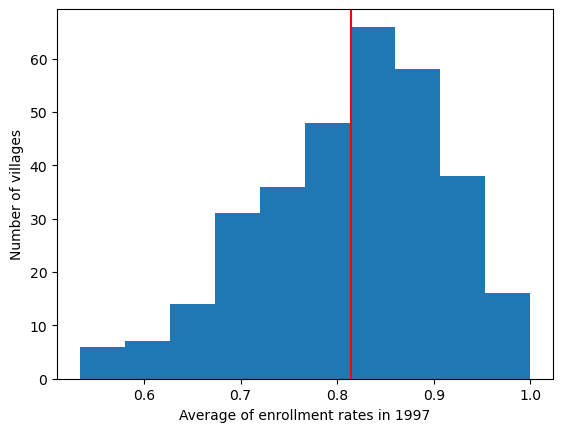

0.8138394110596501


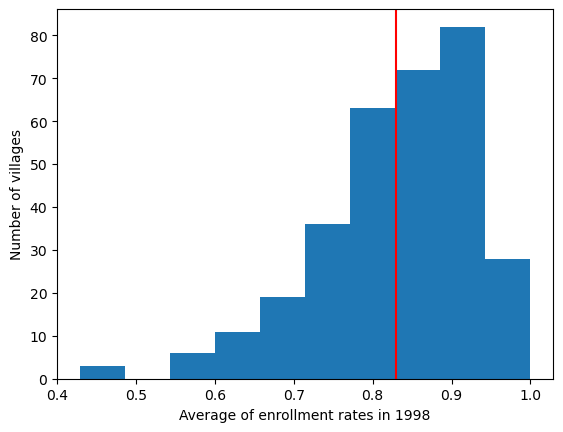

0.8295362042630732


Ttest_indResult(statistic=-2.015713486515638, pvalue=0.044249343422588405)

In [5]:
import matplotlib.pyplot as plt
average(village)
data_97 = pdata[(pdata['year'] == 97) & (pdata['poor'] == 1) & (pdata['progresa'] == 1)].groupby(by = 'village')['sc'].mean()
data_98 = pdata[(pdata['year'] == 98) & (pdata['poor'] == 1) & (pdata['progresa'] == 1)].groupby(by = 'village')['sc'].mean()

hist_97 = plt.hist(data_97)
plt.axvline(x = data_97.mean(), color = 'r')
plt.xlabel('Average of enrollment rates in 1997')
plt.ylabel('Number of villages')
plt.show()
print(data_97.mean())


hist_98 = plt.hist(data_98)
plt.axvline(x = data_98.mean(), color = 'r')
plt.xlabel('Average of enrollment rates in 1998')
plt.ylabel('Number of villages')
plt.show()
print(data_98.mean())

stats.ttest_ind(data_97.dropna(), data_98.dropna(), equal_var = False)

There is a difference between results in 1997 and 1998 and the p-value is less than 0.05. Thus, we can reject null hypothesis and conclude that the difference is statistically significant.

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

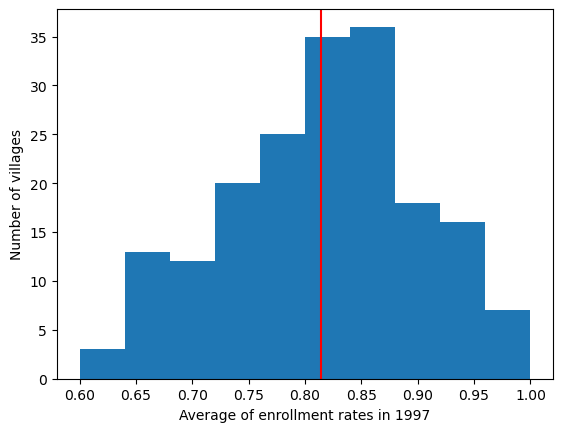

0.8137762497441696


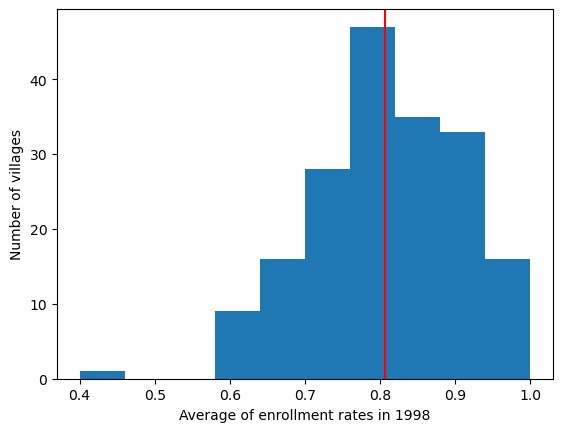

0.8061845192878944


Ttest_indResult(statistic=0.7816669784862521, pvalue=0.43492278313218524)

In [11]:
import matplotlib.pyplot as plt

data_97_C = pdata[(pdata['year'] == 97) & (pdata['poor'] == 1) & (pdata['progresa'] == 0)].groupby(by='village')['sc'].mean()
data_98_C = pdata[(pdata['year'] == 98) & (pdata['poor'] == 1) & (pdata['progresa'] == 0)].groupby(by='village')['sc'].mean()

hist_97_C = plt.hist(data_97_C)
plt.axvline(x = data_97_C.mean(), color='r')
plt.xlabel('Average of enrollment rates in 1997')
plt.ylabel('Number of villages')
plt.show()
print(data_97_C.mean())

hist_98_C = plt.hist(data_98_C)
plt.axvline(x = data_98_C.mean(), color='r')
plt.xlabel('Average of enrollment rates in 1998')
plt.ylabel('Number of villages')
plt.show()
print(data_98_C.mean())

stats.ttest_ind(data_97_C.dropna(), data_98_C.dropna(), equal_var = False)

There is a difference between results in 1997 and 1998. However, since the p-value is bigger than 0.05. Thus, we cannot conclude that the difference is statistically significant. It is a good finding since we find that the treatment increase school enrollment in poor villages but control cannot. This implies that if we can find a control group which has the same baseline in 97 as treatment group, we can prove the effectivity of the treatment. 

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

For this question and subsequent questions, you can use either Welch's t-test or Student's t-test. Please specify in one sentence why you chose the particular t-test.

In [25]:
data_98_T = pdata[(pdata['year'] == 98) & (pdata['poor'] == 1) & (pdata['progresa'] == 1)]['sc']
data_98_C = pdata[(pdata['year'] == 98) & (pdata['poor'] == 1) & (pdata['progresa'] == 0)]['sc']

var_T = data_98_T.var()
var_C = data_98_C.var()
print(var_T)
print(var_C)

print(data_98_T.mean() - data_98_C.mean())
stats.ttest_ind(data_98_T.dropna(), data_98_C.dropna(), equal_var = False)

0.12995985101183213
0.15537440973367608
0.0388421646651228


Ttest_indResult(statistic=8.358720567418374, pvalue=6.636344447523235e-17)

Because the variance of treatment group and control group are different, we cannot assume same sample variance. Thus, I use Welch's t-test  here. 

Since the p-value is less than 0.05, we can reject null hypothesis and conclude that there is statistically significant difference in the means of control and treatment groups in 1998.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [28]:
import statsmodels.formula.api as smf

data_98_s = pdata[(pdata['year'] == 98) & (pdata['poor'] == 1)]

# Regression model.
sm = smf.ols(formula = 'sc ~ progresa', data = data_98_s).fit()
sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           6.64e-17
Time:                        23:53:24   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the result, we can see that for a unit increase in Progresa variable, the average enrollment of children would increase by 0.038 in 1998.

The results are the same as 2.1.

Since the p-value of model intercept and coeff are both near 0, we can reject null hypothese and conclude that treatment effects are not zero.

The counterfactual assumption underlying this regression is without treatment factor, the average enrollment of children of treated group and control group are the same.


### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [25]:
mm = smf.ols(formula = 
'sc ~ progresa + age + dist_sec +  hohedu + \
     indig + sex + welfare_index', 
                        data = data_98_s).fit()
mm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:00:24   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5025      0.014    105.342      0.000       1.475       1.530
progresa          0.0352      0.004      8.799      0.000       0.027       0.043
age              -0.0655      0.001    -95.105      0.000      -0.067      -0.064
dist_sec         -0.0117      0.001    -13.361      0.000      -0.013      -0.010
hohedu            0.0085      0.001     10.951      0.000       0.007       0.010
indig             0.0468      0.004     11.283      0.000       0.039       0.055
sex               0.0310      0.004      7.977      0.000       0.023       0.039
welfare_index  3.227e-05   1.72e-05      1.872      0.061   -1.52e-06    6.61e-05
==============================================================================
Omnibus:                     2993.090   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4083.947
Skew:                          -0.940   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The point estimate of treatment effect changes from 0.038 into 0.0352 after adding more control variables. 

The std of treatment effect changes from 0.005 into 0.004 after adding more control variables.

Thus, we can see after adding more control variables, the average enrollment of children is less effected by the groups they are in in 1998. But the overall model is more accurate to interpret the true result.

For a unit nearest distance to a secondary school, the average enrollment of children would decrease by 0.0117. I don't think it would conclude the household's distance from a secondary school has a causal impact on educational attainment. Because there is no evidence saying that the household's distance from a secondary school does not impact any other variables.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [37]:
data_97_C = pdata[(pdata['year'] == 97) & (pdata['poor'] == 1) & (pdata['progresa'] == 0)]['sc']
data_97_T = pdata[(pdata['year'] == 97) & (pdata['poor'] == 1) & (pdata['progresa'] == 1)]['sc']
data_98_C = pdata[(pdata['year'] == 98) & (pdata['poor'] == 1) & (pdata['progresa'] == 0)]['sc']
data_98_T = pdata[(pdata['year'] == 98) & (pdata['poor'] ==1) & (pdata['progresa'] == 1)]['sc']

diff = (data_98_T.mean() - data_97_T.mean()) - (data_98_C.mean() - data_97_C.mean())
diff
diff_table = pd.DataFrame({"1997": [data_97_C.mean(), data_97_T.mean()], 
                           "1998": [data_98_C.mean(), data_98_T.mean()], 
                           },
                           index = ["Control", "Treatment"])
print(diff_table)

diff = (data_98_T.mean() - data_97_T.mean()) - (data_98_C.mean() - data_97_C.mean())
print(diff)


               1997      1998
Control    0.815186  0.807637
Treatment  0.822697  0.846479
0.031331280319323085


Difference in difference estimate is 0.03133. The result is less than both single regression model, 0.038, and multiple regression model, 0.0352. 

The counterfactual assumption underlying this estimate is that without treatment factor, the change of average enrollment of children in 1997 and 1998 of treated group and control group are the same.


### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [49]:
data_poor = pdata[pdata['poor'] == 1]
result_s = smf.ols("sc ~ progresa*year", data = data_poor).fit()
print(result_s.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.76e-18
Time:                        22:25:54   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5474      0.497      3.112

The coefficient of the progresa is 0.0222. We can see that for a unit increase in Progresa variable, the average enrollment of children would increase by 0.038. The standard errors of this estimates is 0.003, which indicates that there is 0.3% chance that the model is inaccurate. 

In [48]:
result_m = smf.ols("sc ~ progresa*year + age + dist_sec +  hohedu + \
                    indig + sex + welfare_index", 
                    data = data_poor).fit()
print(result_m.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2488.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:25:51   Log-Likelihood:                -16656.
No. Observations:               58013   AIC:                         3.333e+04
Df Residuals:                   58003   BIC:                         3.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2257      0.425     -2.881

The coefficient of the progresa changes from 0.0222 into 0.019, which indicates that for a unit increase in Progresa variable, the average enrollment of children would increase less. 

Difference in difference estimate in 2.4 is 0.03133 which is higher than the effect estimated here. The difference is due to we did not calculate the impact of year and progresa before. 

The counterfactual assumption underlying regression (ii) is that without treatment factor, the change of average enrollment of children in 1997 and 1998 of treated group and control group are the same, if we remove the estimated effect of the non-treatment factors on school enrollment.

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [29]:
data_npoor = pdata[pdata['poor'] == 0]
result_s2 = smf.ols("sc ~ progresa*year", data = data_npoor).fit()
print(result_s2.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           0.000276
Time:                        23:53:27   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5712      1.241     -0.460

In [30]:
result_m2 = smf.ols("sc ~ progresa*year + dist_sec +  hohedu + \
                    indig + sex + welfare_index+progresa*age", 
                    data = data_npoor).fit()
print(result_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     411.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:53:29   Log-Likelihood:                -3664.9
No. Observations:               10334   AIC:                             7352.
Df Residuals:                   10323   BIC:                             7431.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4554      1.058     -2.320

The difference-in-difference estimator is -0.0056. But p-value is 0.893. Thus, we cannot reject null hypthese and cannot conclude that treatment effect of progresa program on the non-poor population is zero.

One reason why PROGRESA might have impacted non-poor households is that the non-poor peoople tried to move themselves below the welfare index to show less  assets to become eligible for PROGRESA and attain their benefits.

We can see that PROGRESA could also impact the age since the p-value is less than 0.05. 


### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 


By the results above, I think Progresa had a causal impact on the enrollment rates of poor households in Mexico especially by the difference in difference results. The model indicates significant results and the model error is very low. But the impact is not very big since the coeff is relative small. 